# Predicting Diabetes Stage Using Diabetes Health Indicators Dataset


## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import set_config
set_config(transform_output="pandas")

# code for ignore all warnings
import warnings
warnings.filterwarnings('ignore')

## Function to Save Figures

In [2]:
# code to save the figures as high-res PNGs
import os
from pathlib import Path
from matplotlib import pyplot as plt

IMAGES_PATH = Path() / "Images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Load Dataset

In [3]:
# diabetes_binary_5050split_health_indicators_BRFSS2015
# Read csv and load into a dataframe
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

## Exploratory Data Analysis (EDA)

### Detailed Info

In [4]:
# See dataset detailed info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

### Summary Statistics

In [5]:
# See the dataset statistical summary
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
# See first 5 rows
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [7]:
# See last 5 rows
df.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
70691,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


### Value Counts

In [8]:
# The value_counts() function returns a Series that contain counts of unique values.
df['Diabetes_binary'].value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [9]:
df['HighBP'].value_counts()

1.0    39832
0.0    30860
Name: HighBP, dtype: int64

In [10]:
df['Smoker'].value_counts()

0.0    37094
1.0    33598
Name: Smoker, dtype: int64

In [11]:
df['Stroke'].value_counts()

0.0    66297
1.0     4395
Name: Stroke, dtype: int64

In [12]:
df['HeartDiseaseorAttack'].value_counts()

0.0    60243
1.0    10449
Name: HeartDiseaseorAttack, dtype: int64

In [13]:
df['Sex'].value_counts()

0.0    38386
1.0    32306
Name: Sex, dtype: int64

In [14]:
df['Education'].value_counts()

6.0    26020
5.0    20030
4.0    19473
3.0     3447
2.0     1647
1.0       75
Name: Education, dtype: int64

In [15]:
df['Income'].value_counts()

8.0    20646
7.0    11425
6.0    10287
5.0     8010
4.0     6658
3.0     5557
2.0     4498
1.0     3611
Name: Income, dtype: int64

### Data Visualization

#### Diabetes Target Variable Count

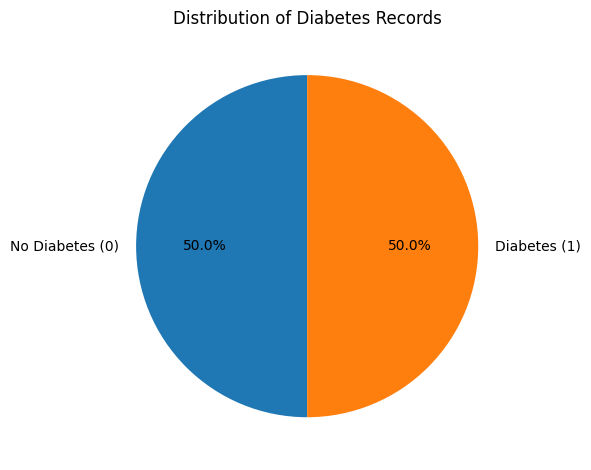

In [16]:
labels = ['No Diabetes (0)', 'Diabetes (1)']
sizes = [df['Diabetes_binary'].value_counts()[0], df['Diabetes_binary'].value_counts()[1]]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Add a title
plt.title('Distribution of Diabetes Records')

# Save the figure
save_fig('Diabetes Pie Chart')
# Show the pie chart
plt.show()

#### Diabetes Records per Gender

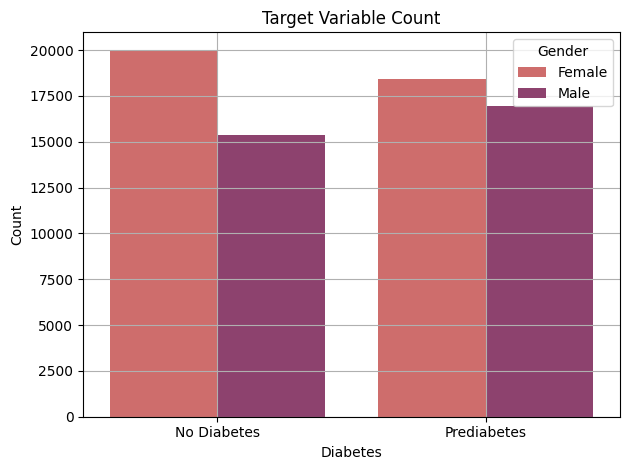

In [17]:
# 0 = no diabetes 1 = prediabetes
# 0 = female 1 = male

# Create a countplot
sns.countplot(data=df, x='Diabetes_binary', hue='Sex', palette="flare")

# Set plot labels
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.title("Target Variable Count")
plt.legend(title="Gender", labels=["Female", "Male"])
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Prediabetes'])
plt.grid()

# Save the figure
save_fig('Target variable countplot_Hue_grid')
# Show the plot
plt.show()

#### Relationship Between Diabetes and Stroke

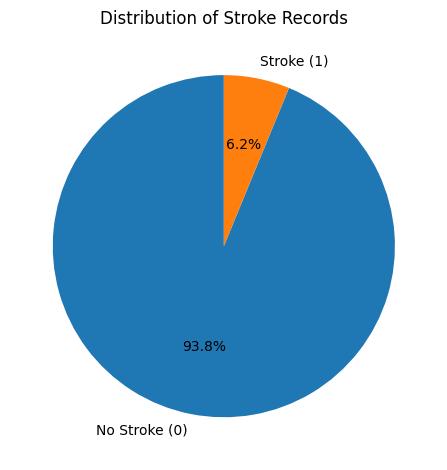

In [18]:
# Pie Chart
labels = ['No Stroke (0)', 'Stroke (1)']
sizes = [df['Stroke'].value_counts()[0], df['Stroke'].value_counts()[1]]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Add a title
plt.title('Distribution of Stroke Records')

# Save the figure
save_fig('Stroke Pie Chart')
# Show the pie chart
plt.show()

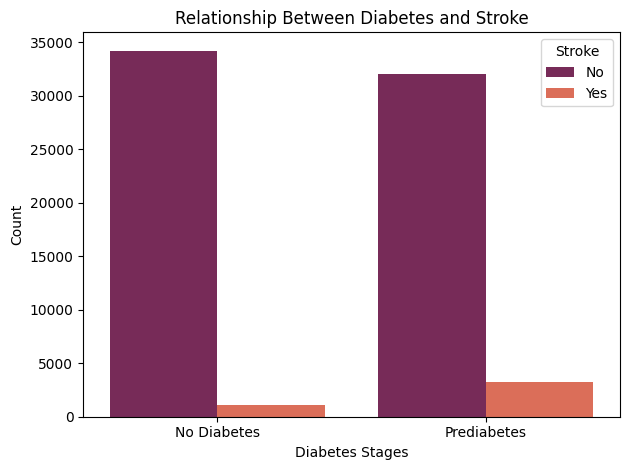

In [19]:
# Create a countplot
sns.countplot(data=df, x="Diabetes_binary", hue="Stroke", palette="rocket")
# Set plot labels
plt.xlabel("Diabetes Stages")
plt.ylabel("Count")
plt.title("Relationship Between Diabetes and Stroke")
plt.legend(title="Stroke", labels=["No", "Yes"])
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Prediabetes'])
# Save the figure
save_fig("Diabetes and Stroke")
# Show the plot
plt.show()

#### Relationship Between Diabetes and HighBP

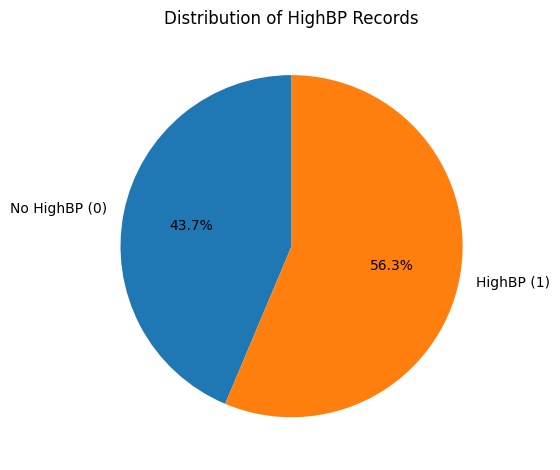

In [20]:
# Pie Chart
labels = ['No HighBP (0)', 'HighBP (1)']
sizes = [df['HighBP'].value_counts()[0], df['HighBP'].value_counts()[1]]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Add a title
plt.title('Distribution of HighBP Records')

# Save the figure
save_fig('HighBP Pie Chart')
# Show the pie chart
plt.show()

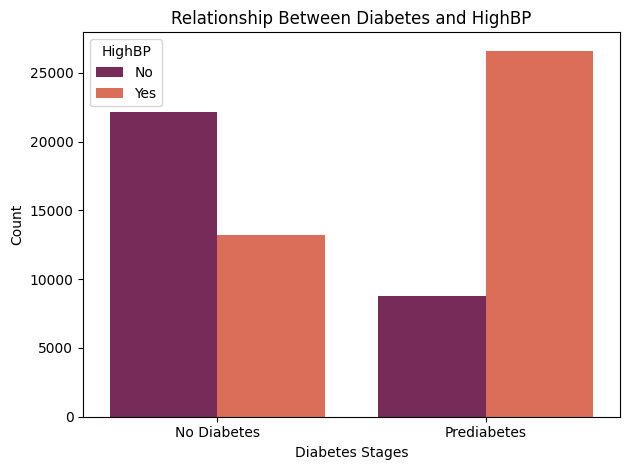

In [21]:
# Create a countplot
sns.countplot(data=df, x="Diabetes_binary", hue="HighBP", palette="rocket")
# Set plot labels
plt.xlabel("Diabetes Stages")
plt.ylabel("Count")
plt.title("Relationship Between Diabetes and HighBP")
plt.legend(title="HighBP", labels=["No", "Yes"])
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Prediabetes'])

# Save the figure
save_fig("Diabetes and HighBP")
# Show the plot
plt.show()

#### Relationship Between Diabetes and HighChol

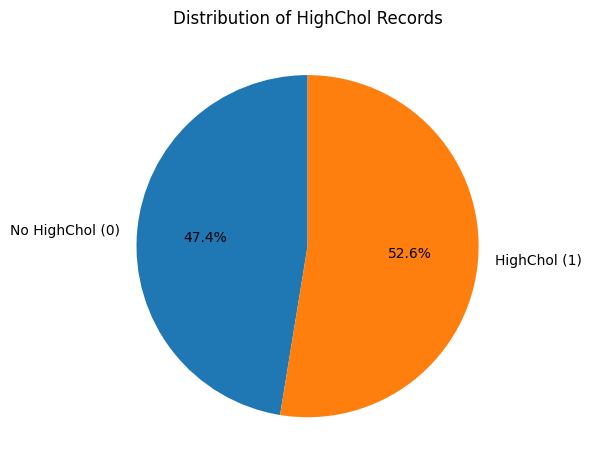

In [22]:
# Pie Chart
labels = ['No HighChol (0)', 'HighChol (1)']
sizes = [df['HighChol'].value_counts()[0], df['HighChol'].value_counts()[1]]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Add a title
plt.title('Distribution of HighChol Records')

# Save the figure
save_fig('HighChol Pie Chart')
# Show the pie chart
plt.show()

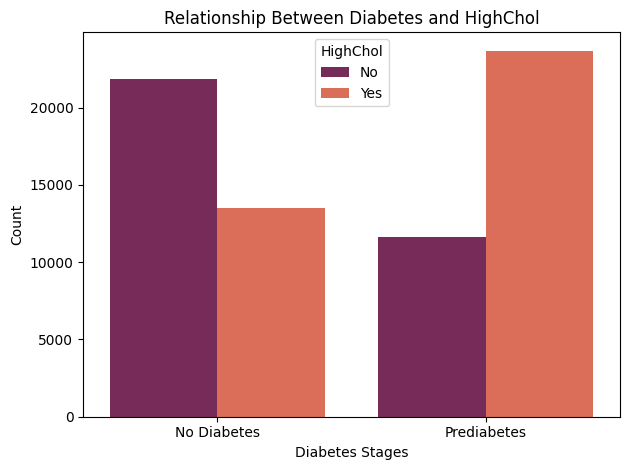

In [23]:
# Create a countplot
sns.countplot(data=df, x="Diabetes_binary", hue="HighChol", palette="rocket")
# Set plot labels
plt.xlabel("Diabetes Stages")
plt.ylabel("Count")
plt.title("Relationship Between Diabetes and HighChol")
plt.legend(title="HighChol", labels=["No", "Yes"])
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Prediabetes'])

# Save the figure
save_fig("Diabetes and HighChol")
# Show the plot
plt.show()

#### BMI Distribution by Diabetes Stages

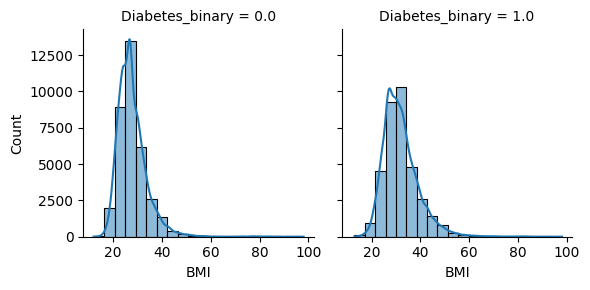

In [24]:
# Create a FacetGrid with separate histograms for each diabetes class
#FacetGrid is aMulti-plot grid for plotting conditional relationships
g = sns.FacetGrid(data=df, col='Diabetes_binary')
g.map(sns.histplot, 'BMI', bins=20, kde=True)

# Set plot labels
# plt.title("BMI Distribution for Each Diabetes Class")
# Save the figure
save_fig("BMI Distribution each class")
# Show the plot
plt.show()

#### Relationship Between Diabetes and Smoker

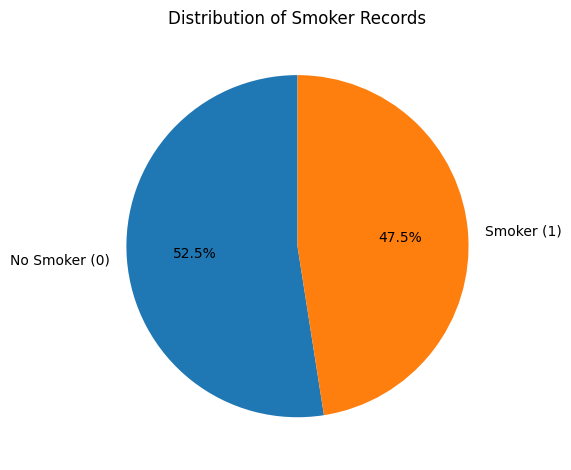

In [25]:
# Pie Chart
labels = ['No Smoker (0)', 'Smoker (1)']
sizes = [df['Smoker'].value_counts()[0], df['Smoker'].value_counts()[1]]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Add a title
plt.title('Distribution of Smoker Records')

# Save the figure
save_fig('Smoker Pie Chart')
# Show the pie chart
plt.show()

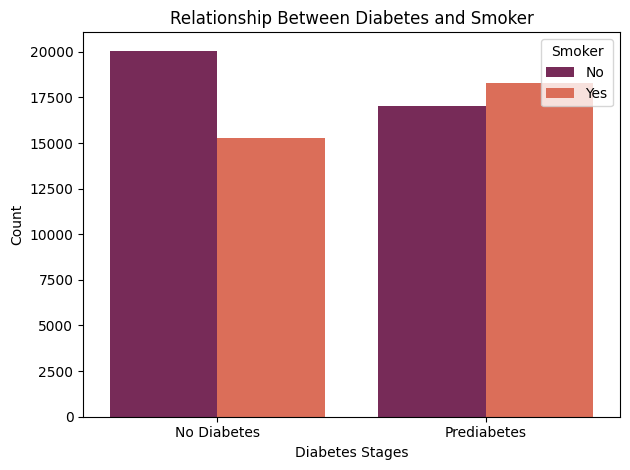

In [26]:
# Create a countplot
sns.countplot(data=df, x="Diabetes_binary", hue="Smoker", palette="rocket")
# Set plot labels
plt.xlabel("Diabetes Stages")
plt.ylabel("Count")
plt.title("Relationship Between Diabetes and Smoker")
plt.legend(title="Smoker", labels=["No", "Yes"])
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Prediabetes'])

# Save the figure
save_fig("Diabetes and Smoker")
# Show the plot
plt.show()

#### Relationship Between Diabetes and Heart Disease

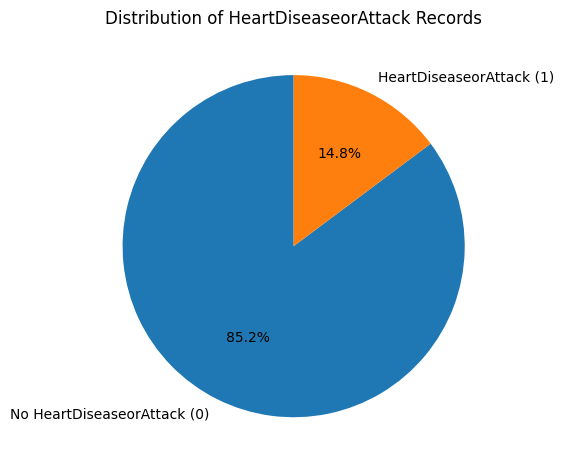

In [27]:
# Pie Chart
labels = ['No HeartDiseaseorAttack (0)', 'HeartDiseaseorAttack (1)']
sizes = [df['HeartDiseaseorAttack'].value_counts()[0], df['HeartDiseaseorAttack'].value_counts()[1]]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Add a title
plt.title('Distribution of HeartDiseaseorAttack Records')

# Save the figure
save_fig('HeartDiseaseorAttack Pie Chart')
# Show the pie chart
plt.show()

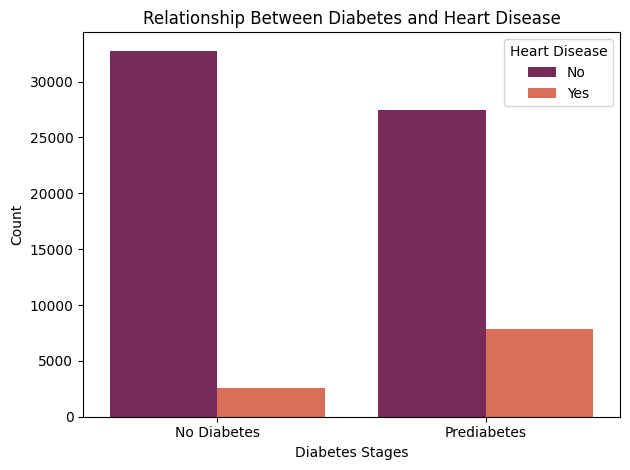

In [28]:
# Create a countplot
sns.countplot(data=df, x="Diabetes_binary", hue="HeartDiseaseorAttack", palette="rocket")
# Set plot labels
plt.xlabel("Diabetes Stages")
plt.ylabel("Count")
plt.title("Relationship Between Diabetes and Heart Disease")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Prediabetes'])

# Save the figure
save_fig("Diabetes and Heart Disease")
# Show the plot
plt.show()

#### Relationship Between Diabetes and Physical Activity

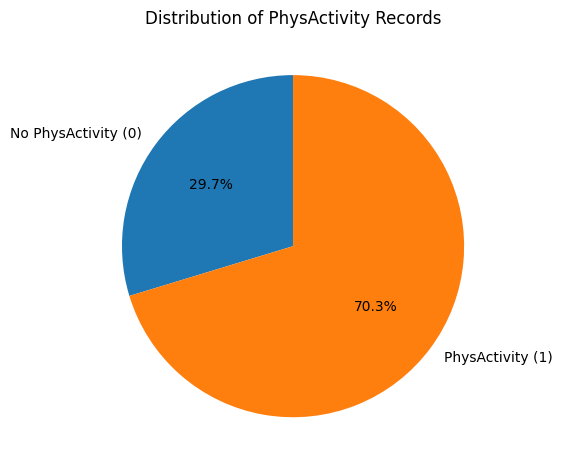

In [29]:
# Pie Chart
labels = ['No PhysActivity (0)', 'PhysActivity (1)']
sizes = [df['PhysActivity'].value_counts()[0], df['PhysActivity'].value_counts()[1]]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Add a title
plt.title('Distribution of PhysActivity Records')

# Save the figure
save_fig('PhysActivity Pie Chart')
# Show the pie chart
plt.show()

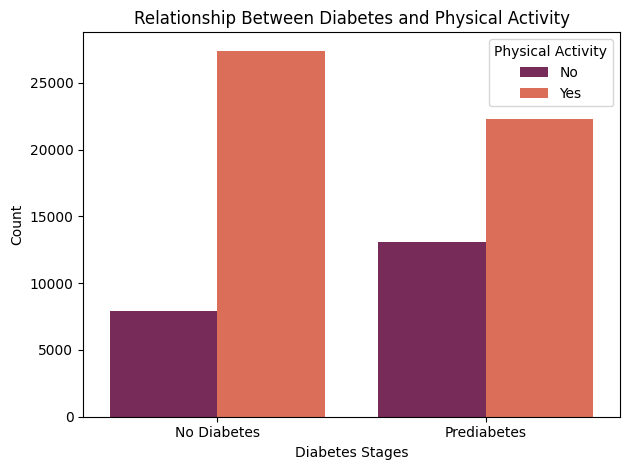

In [30]:
# Create a countplot
sns.countplot(data=df, x="Diabetes_binary", hue="PhysActivity", palette="rocket")
# Set plot labels
plt.xlabel("Diabetes Stages")
plt.ylabel("Count")
plt.title("Relationship Between Diabetes and Physical Activity")
plt.legend(title="Physical Activity", labels=["No", "Yes"])
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Prediabetes'])

# Save the figure
save_fig("Diabetes and Physical Activity")
# Show the plot
plt.show()

#### Relationship Between Diabetes and Gender

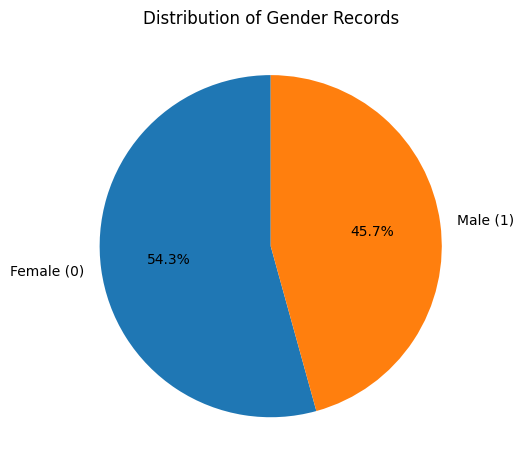

In [31]:
# Pie Chart
labels = ['Female (0)', 'Male (1)']
sizes = [df['Sex'].value_counts()[0], df['Sex'].value_counts()[1]]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Add a title
plt.title('Distribution of Gender Records')

# Save the figure
save_fig('Gender Pie Chart')
# Show the pie chart
plt.show()

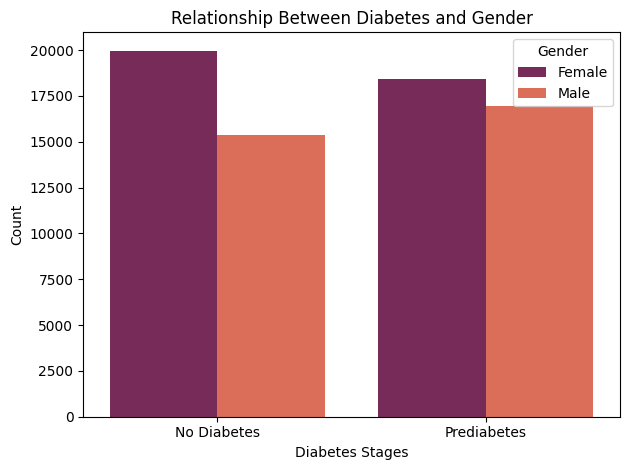

In [32]:
# Create a countplot
sns.countplot(data=df, x="Diabetes_binary", hue="Sex", palette="rocket")
# Set plot labels
plt.xlabel("Diabetes Stages")
plt.ylabel("Count")
plt.title("Relationship Between Diabetes and Gender")
# 0 = female 1 = male
plt.legend(title="Gender", labels=["Female", "Male"])
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Prediabetes'])

# Save the figure
save_fig("Diabetes and Gender")
# Show the plot
plt.show()

#### Histogram of BMI

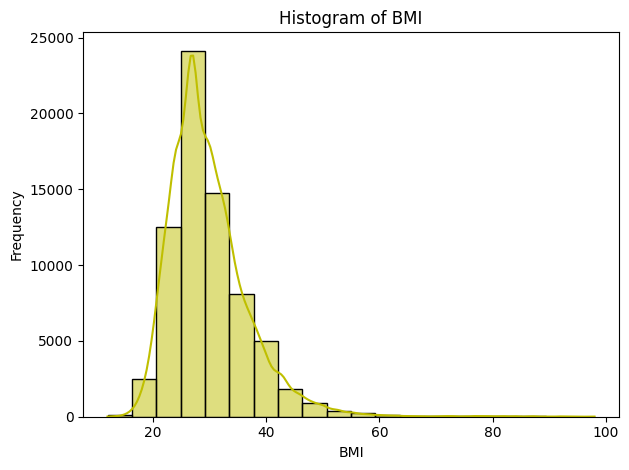

In [33]:
# Create a histogram using Seaborn
sns.histplot(data=df, x='BMI', bins=20, kde=True, color='y')

# Add labels and a title
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')

# Save the figure
save_fig("Histogram of BMI")
# Show the histogram
plt.show()

#### Histogram of Mental Health

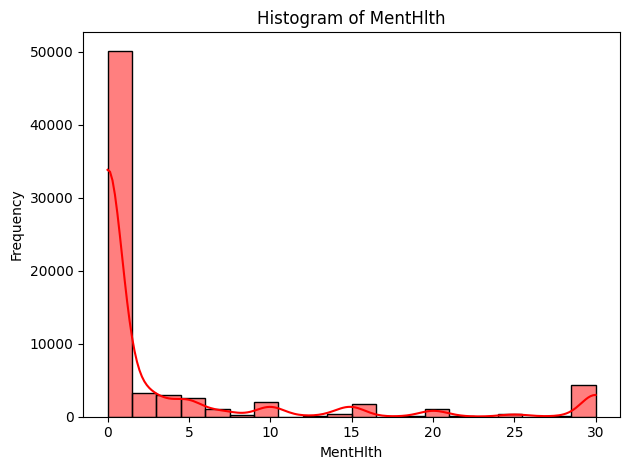

In [34]:
# Create a histogram using Seaborn
sns.histplot(data=df, x='MentHlth', bins=20, kde=True, color='r')

# Add labels and a title
plt.xlabel('MentHlth')
plt.ylabel('Frequency')
plt.title('Histogram of MentHlth')

# Save the figure
save_fig("Histogram of MentHlth")
# Show the histogram
plt.show()

#### Histogram of PhysHlth

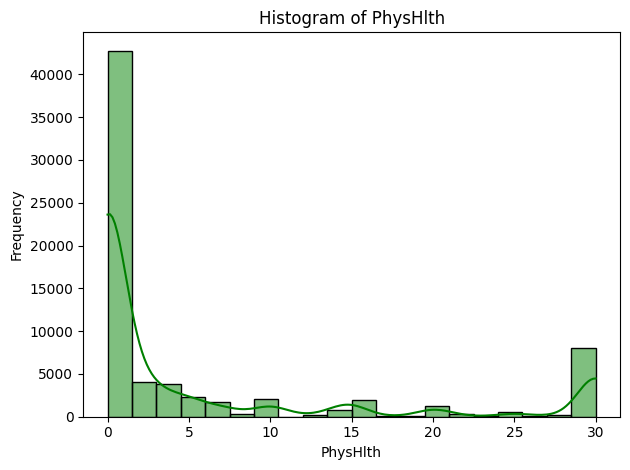

In [35]:
# Create a histogram using Seaborn
sns.histplot(data=df, x='PhysHlth', bins=20, kde=True, color='g')

# Add labels and a title
plt.xlabel('PhysHlth')
plt.ylabel('Frequency')
plt.title('Histogram of PhysHlth')

# Save the figure
save_fig("Histogram of PhysHlth")
# Show the histogram
plt.show()

#### Histogram of Age

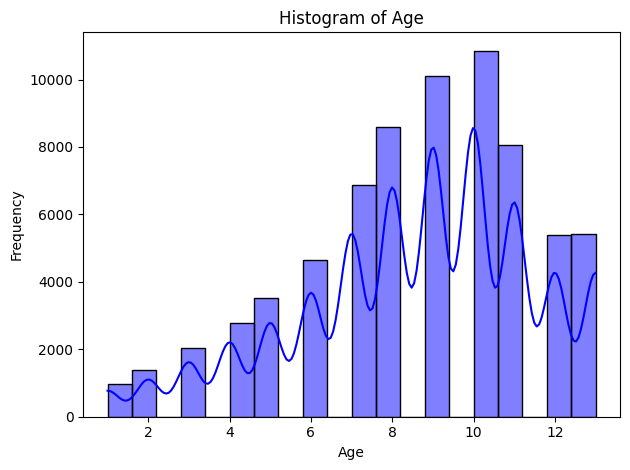

In [36]:
# Create a histogram using Seaborn
sns.histplot(data=df, x='Age', bins=20, kde=True, color='b')

# Add labels and a title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Save the figure
save_fig("Histogram of Age")
# Show the histogram
plt.show()

### Preprocessing

#### Handle Missing Values

In [37]:
# Check for missing values
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#### Handle Duplicates

In [38]:
#Check the shape of the dataframe
print('Shape of the dataset:',df.shape)

#Check for duplicate rows
dup = df[df.duplicated()]
print('Number of duplicate rows:',dup.shape[0])

#Drop duplicates rows
df = df.drop_duplicates()
print('Shape after dropping duplicates:',df.shape)

Shape of the dataset: (70692, 22)
Number of duplicate rows: 1635
Shape after dropping duplicates: (69057, 22)


In [39]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


#### Handle Outliers

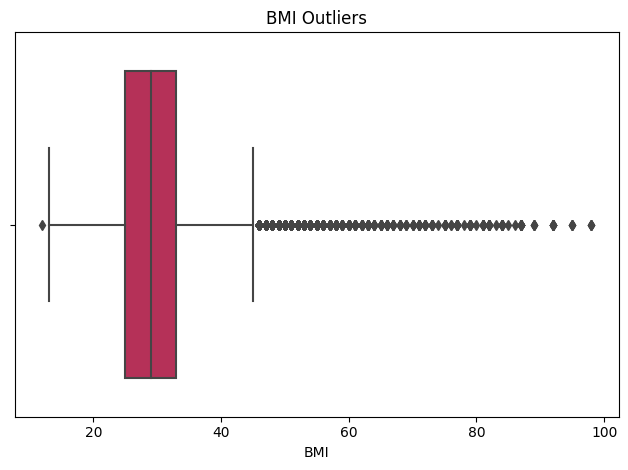

In [40]:
# Boxplot
sns.boxplot(x=df["BMI"], palette='rocket')
# Set plot labels
plt.xlabel("BMI")
plt.title("BMI Outliers")

# Save the figure
save_fig("Outliers BMI")
# Show the plot
plt.show()

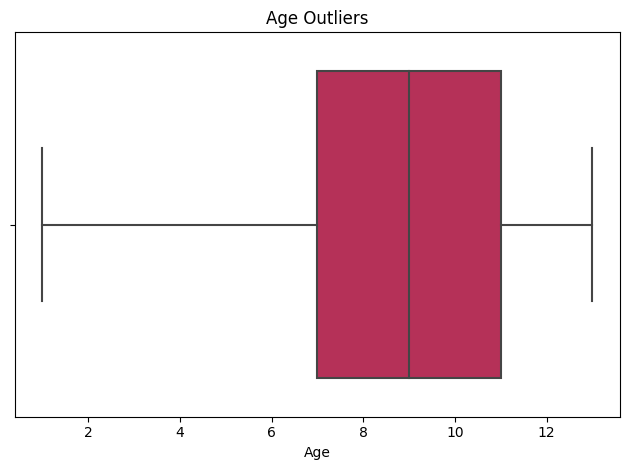

In [41]:
# Boxplot
sns.boxplot(x=df["Age"], palette='rocket')
# Set plot labels
plt.xlabel("Age")
plt.title("Age Outliers")

# Save the figure
save_fig("Outliers Age")
# Show the plot
plt.show()

In [42]:
def count_outliers(dataframe, column_name):
    column_data = dataframe[column_name]

    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    outliers = column_data[(column_data<lower_bound) | (column_data>upper_bound)]
    return len(outliers)

In [43]:
attributes = ['BMI', 'Age']

for attribute in attributes:
    count = count_outliers(df, attribute)
    print(attribute,'outliers:',count,'out of',len(df[attribute]))

BMI outliers: 2181 out of 69057
Age outliers: 0 out of 69057


In [44]:
def remove_outliers(dataFrame, column_name):
    column_data = dataFrame[column_name]
    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)
    iqr = q3-q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    filtered_df = dataFrame[(column_data >= lower_bound) & (column_data <= upper_bound)]
    return filtered_df

In [45]:
outlier_removed_df = remove_outliers(df,'BMI')
print("Original df:",df.shape)
print("Df shape after removing outlier:",outlier_removed_df.shape)

Original df: (69057, 22)
Df shape after removing outlier: (66876, 22)


In [46]:
# Replace the df
df = outlier_removed_df

In [47]:
df.shape

(66876, 22)

#### Correlation Matrix

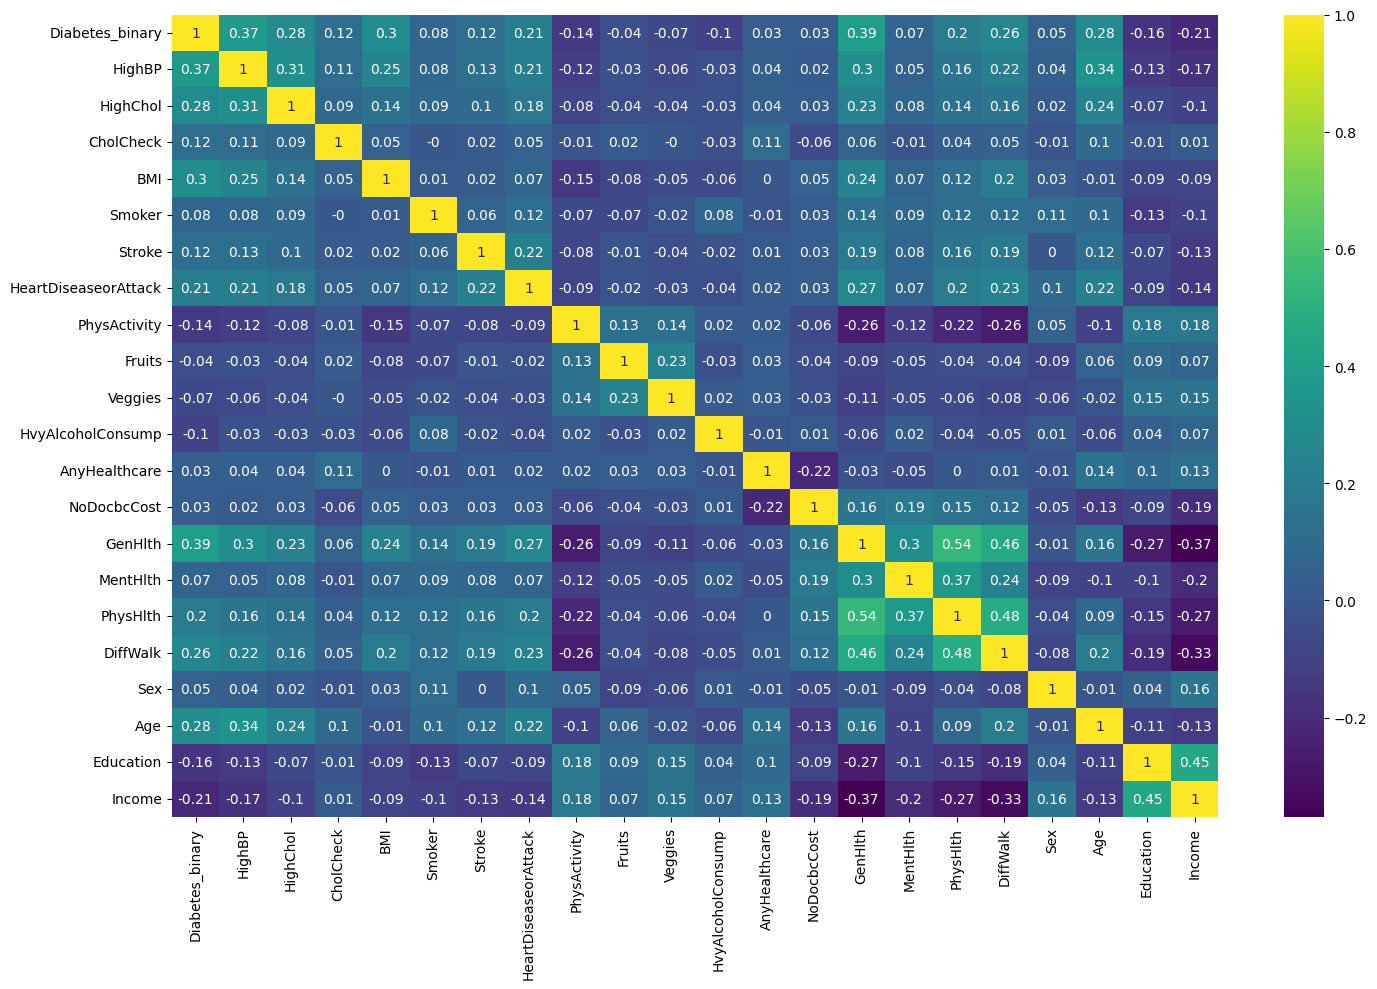

In [48]:
# Checking correlation in test set data
import seaborn as sns

plt.figure(figsize = (15,10))
sns.heatmap(df.corr().round(2), annot=True, cmap='viridis')
save_fig('correlation')
plt.show()

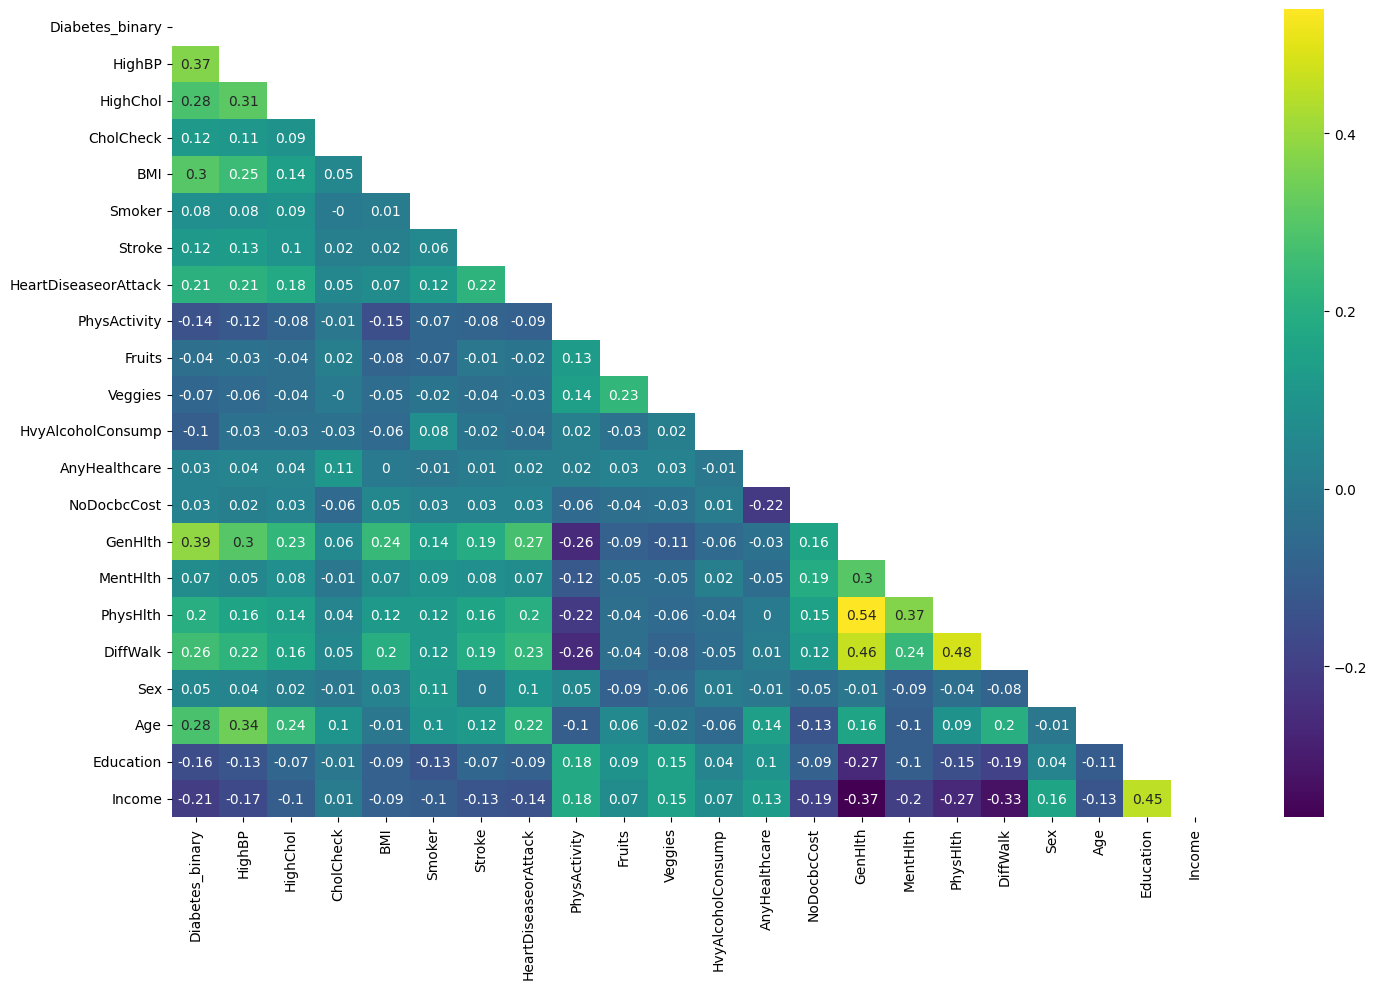

In [49]:
import seaborn as sns

mask = np.triu(df.corr())
#mask = np.tril(df.corr())
plt.figure(figsize = (15,10))
sns.heatmap(df.corr().round(2), annot=True, cmap='viridis', mask=mask)
save_fig('correlation-lower tiangle')
plt.show()

#### Label Encoding
Cheked all feature data types. Here all of the features are already in neumerical format. We do not need to perform label encoding on this dataset.

In [50]:
# Check all the data types for each feature
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

#### Dataset Split

##### Train and Test Set

In [51]:
# train = 70%
# test = 15%
# val = 15%
from sklearn.model_selection import train_test_split

# Extracting x and y
y = df['Diabetes_binary']
x = df.drop(columns = 'Diabetes_binary')

# Splitting the df into a train set (70%) and test set (30%)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)

In [52]:
# Main df shape
print(df.shape)

# Train set shape
print(x_train.shape)
print(y_train.shape)

# Temporary set shape
print(x_temp.shape)
print(y_temp.shape)

(66876, 22)
(46813, 21)
(46813,)
(20063, 21)
(20063,)


##### Validation Set

In [53]:
# Further splitting the temporary set into validation set (15%) and test set (15%)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [54]:
# Main df shape
print(df.shape)

# Train set shape
print(x_train.shape)
print(y_train.shape)

# Validation set shape
print(x_val.shape)
print(y_val.shape)

# Test set shape
print(x_test.shape)
print(y_test.shape)

(66876, 22)
(46813, 21)
(46813,)
(10031, 21)
(10031,)
(10032, 21)
(10032,)


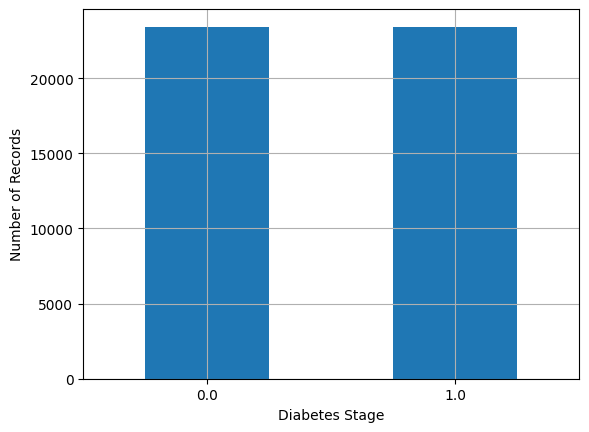

In [55]:
# Visualize the distrubution in y_train
y_train.value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Diabetes Stage")
plt.ylabel("Number of Records")
plt.show()

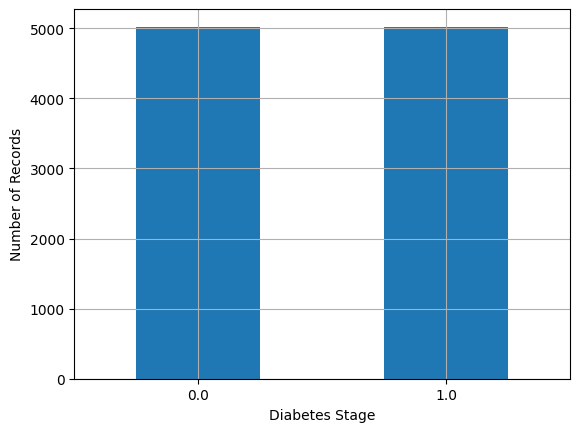

In [56]:
# Visualize the distrubution in y_val
y_val.value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Diabetes Stage")
plt.ylabel("Number of Records")
plt.show()

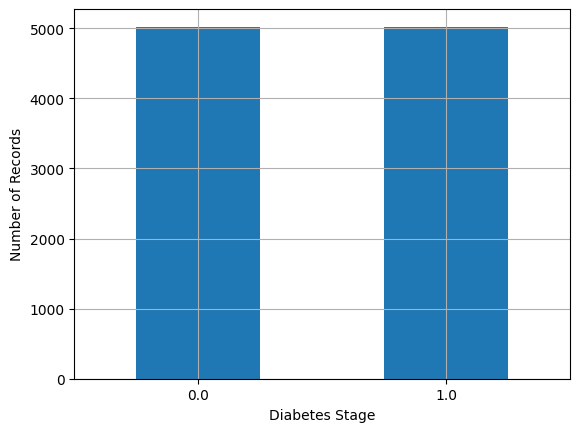

In [57]:
# Visualize the distrubution in y_test
y_test.value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Diabetes Stage")
plt.ylabel("Number of Records")
plt.show()

#### Feature Scaling
**Standardization**

Scale features to have a mean of 0 and a standard deviation of 1.

Formula: X_standardized = (X - X_mean) / X_std_dev

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# normalizing all x_train, x_val and x_test sets
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_val = pd.DataFrame(scaler.fit_transform(x_val), columns=x_val.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

In [59]:
x_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
63600,0.880858,0.949636,0.162129,0.488875,-0.966531,-0.260226,-0.419804,0.649932,0.806822,0.523811,...,0.21919,-0.322009,0.145409,-0.459556,-0.575046,-0.573165,1.079195,0.480784,1.061328,-0.316186
59667,0.880858,0.949636,0.162129,-0.211631,1.034628,-0.260226,2.382063,0.649932,-1.239431,0.523811,...,0.21919,-0.322009,1.961337,3.249679,1.225423,-0.573165,1.079195,-0.563896,-0.888553,-0.779155
52398,0.880858,0.949636,0.162129,1.014254,-0.966531,-0.260226,2.382063,-1.538622,-1.239431,-1.909086,...,0.21919,-0.322009,1.961337,1.642344,2.425736,1.744698,-0.926616,-0.215670,0.086387,-2.168065
55097,-1.135257,0.949636,0.162129,0.138622,1.034628,-0.260226,-0.419804,0.649932,0.806822,0.523811,...,0.21919,-0.322009,-0.762556,-0.459556,-0.575046,-0.573165,1.079195,0.829011,1.061328,1.072723
48986,0.880858,-1.053035,0.162129,-0.211631,1.034628,-0.260226,-0.419804,0.649932,0.806822,0.523811,...,0.21919,-0.322009,1.053373,-0.459556,0.425215,-0.573165,-0.926616,0.480784,0.086387,-0.779155


In [60]:
x_val.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
62916,0.874161,0.940459,0.158227,0.307874,-0.956197,-0.261056,-0.419649,-1.562046,-1.271886,-1.925978,...,0.210857,-0.320234,0.147073,-0.459340,-0.577917,-0.567872,1.081791,-0.574685,0.097971,0.599442
18356,-1.143954,-1.063310,-6.320036,-0.213972,1.045809,-0.261056,-0.419649,-1.562046,0.786234,0.519217,...,0.210857,-0.320234,0.147073,-0.459340,-0.577917,-0.567872,-0.924393,-1.967369,1.053021,-1.244895
62363,-1.143954,-1.063310,0.158227,0.655771,1.045809,-0.261056,-0.419649,0.640186,0.786234,-1.925978,...,0.210857,3.122714,0.147073,2.978558,-0.577917,-0.567872,-0.924393,-0.922856,0.097971,0.138357
62808,-1.143954,0.940459,0.158227,0.307874,-0.956197,-0.261056,-0.419649,0.640186,0.786234,0.519217,...,0.210857,-0.320234,1.046640,-0.213776,2.412533,1.760960,-0.924393,-1.271027,0.097971,-0.322727
3255,-1.143954,-1.063310,0.158227,-1.431611,1.045809,-0.261056,-0.419649,0.640186,0.786234,0.519217,...,0.210857,-0.320234,-0.752494,0.154570,-0.577917,-0.567872,-0.924393,0.817999,0.097971,0.138357


In [61]:
x_test.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
51593,-1.148011,0.925049,0.163115,-0.918489,1.020546,-0.256658,-0.423723,0.649282,0.800012,0.521813,...,0.219718,-0.323047,1.055636,0.151662,-0.571407,-0.571979,1.092148,-1.293967,-0.879620,-0.768007
42489,0.871072,0.925049,0.163115,1.015696,1.020546,-0.256658,-0.423723,0.649282,0.800012,0.521813,...,0.219718,-0.323047,0.147858,-0.460305,-0.067800,-0.571979,1.092148,0.115411,1.075048,1.066651
58588,0.871072,0.925049,0.163115,0.664026,1.020546,-0.256658,2.360031,0.649282,0.800012,0.521813,...,0.219718,-0.323047,1.055636,-0.337911,-0.269243,-0.571979,-0.915627,0.820100,1.075048,-0.309342
10093,-1.148011,-1.081024,0.163115,-0.215149,-0.979868,-0.256658,-0.423723,-1.540163,-1.249981,-1.916394,...,0.219718,-0.323047,-0.759920,-0.460305,-0.571407,-0.571979,1.092148,1.524789,-0.879620,0.607986
13594,-1.148011,-1.081024,0.163115,-0.566819,-0.979868,-0.256658,-0.423723,0.649282,-1.249981,0.521813,...,0.219718,-0.323047,-0.759920,0.029268,-0.369964,-0.571979,1.092148,0.820100,-1.856953,-0.309342


### Model Training

In [62]:
!pip install scikit-plot

#### KNN Classifier

              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69      5021
         1.0       0.69      0.73      0.71      5010

    accuracy                           0.70     10031
   macro avg       0.70      0.70      0.70     10031
weighted avg       0.70      0.70      0.70     10031

Validation Accuracy  0.7022231083640714
Train Accuracy  0.7944588041783265


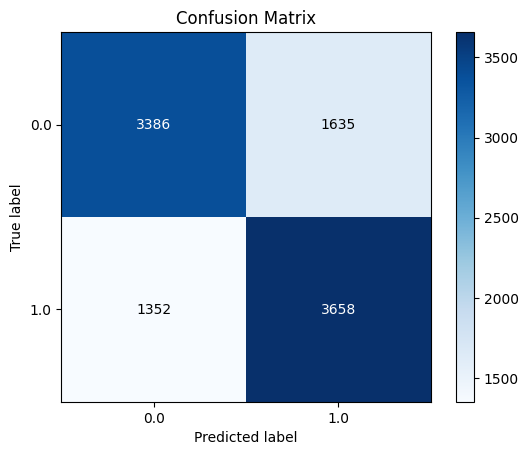

In [63]:
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the model with default parameters
knn = KNeighborsClassifier()
# Fit the model with train set
knn.fit(x_train, y_train)
# Make predictions on the validation set
y_pred_knn = knn.predict(x_val)
# See classification Report
print(classification_report(y_val, y_pred_knn))
# Print Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred_knn)
# Training and validation accuracy
print('Validation Accuracy ', accuracy_score(y_val, y_pred_knn))
print('Train Accuracy ', accuracy_score(y_train, knn.predict(x_train)))

              precision    recall  f1-score   support

         0.0       0.72      0.69      0.70      5021
         1.0       0.70      0.73      0.72      5011

    accuracy                           0.71     10032
   macro avg       0.71      0.71      0.71     10032
weighted avg       0.71      0.71      0.71     10032

Test Accuracy  0.7086323763955343


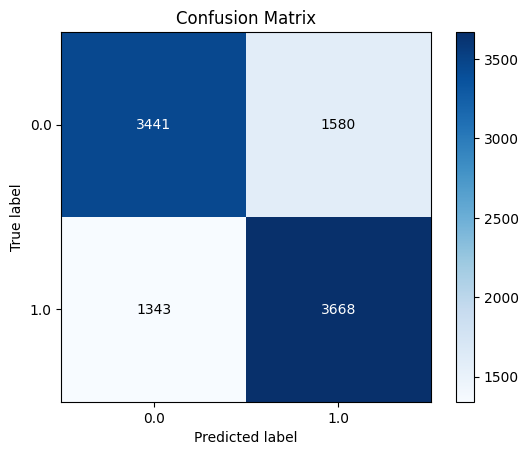

In [64]:
# Make predictions on the test  set
y_pred_knn = knn.predict(x_test)
# See classification Report
print(classification_report(y_test, y_pred_knn))
# Print Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn)
# Testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred_knn))

#### DecisionTree Classifier

              precision    recall  f1-score   support

         0.0       0.65      0.66      0.65      5021
         1.0       0.65      0.64      0.64      5010

    accuracy                           0.65     10031
   macro avg       0.65      0.65      0.65     10031
weighted avg       0.65      0.65      0.65     10031

Validation Accuracy  0.6474927724055428
Train Accuracy  0.9958772135945143


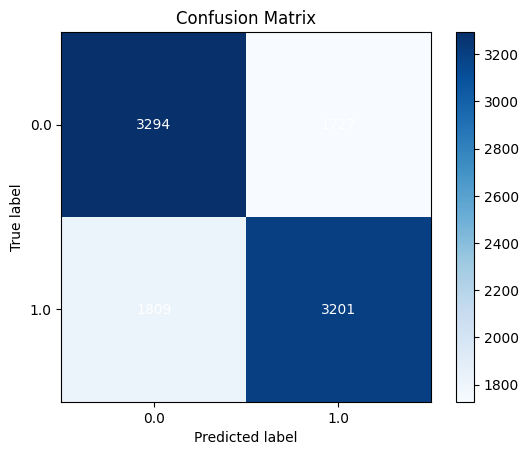

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the model with default parameters
dt = DecisionTreeClassifier(random_state=42)
# Fit the model with train set
dt.fit(x_train, y_train)
# Make predictions on the validation set
y_pred_dt = dt.predict(x_val)
# See classification report
print(classification_report(y_val, y_pred_dt))
# Print Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred_dt)
# Training and validation accuracy
print('Validation Accuracy ', accuracy_score(y_val, y_pred_dt))
print('Train Accuracy ', accuracy_score(y_train, dt.predict(x_train)))

              precision    recall  f1-score   support

         0.0       0.64      0.65      0.65      5021
         1.0       0.65      0.64      0.64      5011

    accuracy                           0.65     10032
   macro avg       0.65      0.65      0.65     10032
weighted avg       0.65      0.65      0.65     10032

Test Accuracy  0.6450358851674641


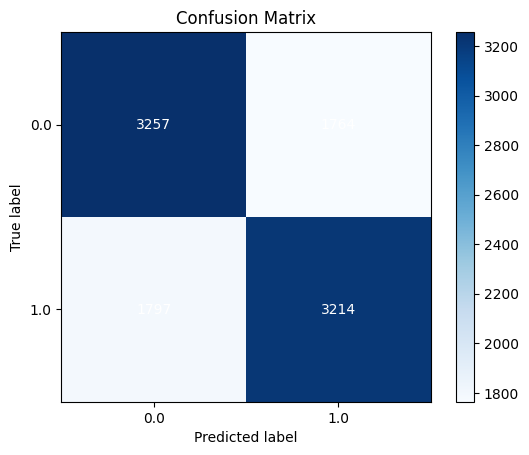

In [66]:
# Make predictions on the test  set
y_pred_dt = dt.predict(x_test)
# See classification Report
print(classification_report(y_test, y_pred_dt))
# Print Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_dt)
# Testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred_dt))

#### Random Forest Classifier

              precision    recall  f1-score   support

         0.0       0.74      0.69      0.72      5021
         1.0       0.71      0.76      0.74      5010

    accuracy                           0.73     10031
   macro avg       0.73      0.73      0.73     10031
weighted avg       0.73      0.73      0.73     10031

Validation Accuracy  0.7273452297876583
Train Accuracy  0.9958772135945143


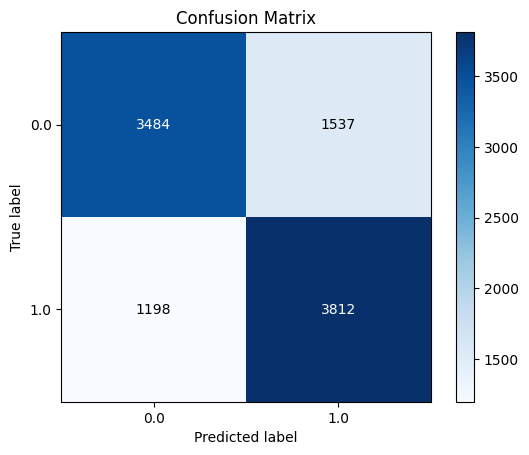

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model with default parameters
rf = RandomForestClassifier(random_state=42)
# Fit the model with train set
rf.fit(x_train,y_train)
# Make predictions on the validation set
y_pred_rf = rf.predict(x_val)
# See classification report
print(classification_report(y_val, y_pred_rf))
# Print Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred_rf)
# Training and validation accuracy
print('Validation Accuracy ', accuracy_score(y_val, y_pred_rf))
print('Train Accuracy ', accuracy_score(y_train, rf.predict(x_train)))

              precision    recall  f1-score   support

         0.0       0.75      0.68      0.71      5021
         1.0       0.71      0.77      0.74      5011

    accuracy                           0.73     10032
   macro avg       0.73      0.73      0.73     10032
weighted avg       0.73      0.73      0.73     10032

Test Accuracy  0.7265749601275917


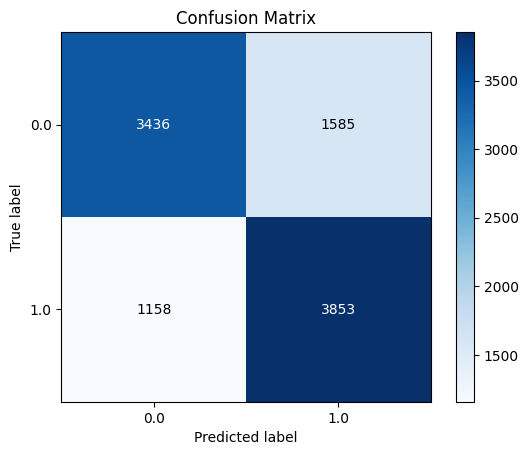

In [68]:
# Make predictions on the test  set
y_pred_rf = rf.predict(x_test)
# See classification Report
print(classification_report(y_test, y_pred_rf))
# Print Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf)
# Testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred_rf))

#### Support Vector Machine (SVM)

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      5021
         1.0       0.72      0.80      0.76      5010

    accuracy                           0.75     10031
   macro avg       0.75      0.75      0.75     10031
weighted avg       0.75      0.75      0.75     10031

Validation Accuracy  0.7465855846874688
Train Accuracy  0.7625018691389144


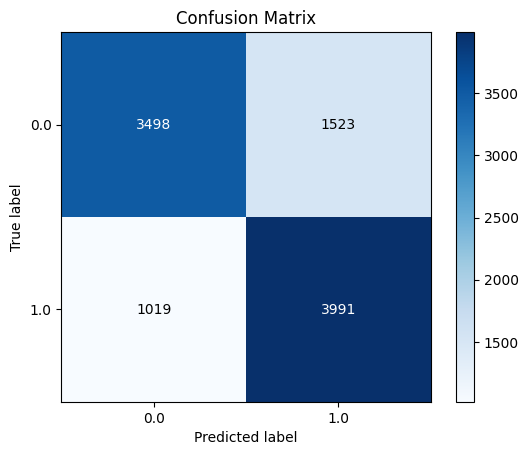

In [69]:
from sklearn.svm import SVC

# Initialize the model with default parameters
svm = SVC(random_state=42)
# Fit the model with train set
svm.fit(x_train,y_train)
# Make predictions on the validation set
y_pred_svm = svm.predict(x_val)
# See classification report
print(classification_report(y_val, y_pred_svm))
# Print Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred_svm)
# Training and validation accuracy
print('Validation Accuracy ', accuracy_score(y_val, y_pred_svm))
print('Train Accuracy ', accuracy_score(y_train, svm.predict(x_train)))

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73      5021
         1.0       0.72      0.80      0.76      5011

    accuracy                           0.74     10032
   macro avg       0.75      0.74      0.74     10032
weighted avg       0.75      0.74      0.74     10032

Test Accuracy  0.7438197767145136


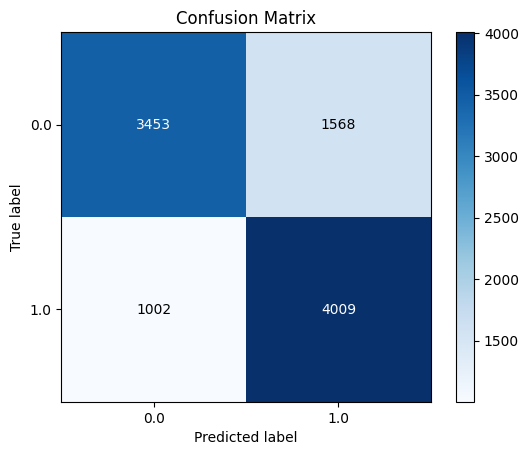

In [70]:
# Make predictions on the test  set
y_pred_svm = svm.predict(x_test)
# See classification Report
print(classification_report(y_test, y_pred_svm))
# Print Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_svm)
# Testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred_svm))

#### Logistic Regression

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      5021
         1.0       0.74      0.76      0.75      5010

    accuracy                           0.75     10031
   macro avg       0.75      0.75      0.75     10031
weighted avg       0.75      0.75      0.75     10031

Validation Accuracy  0.7463862027714087
Train Accuracy  0.7440881806335847


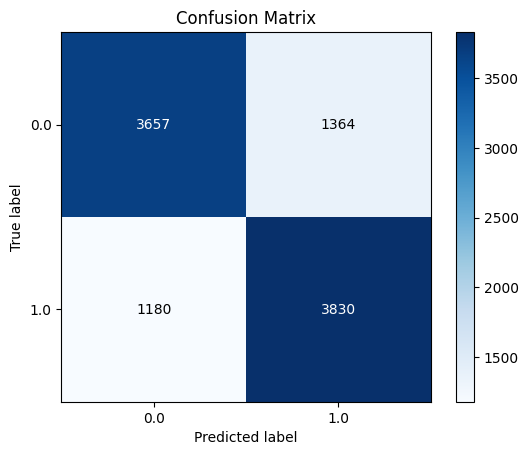

In [71]:
from sklearn.linear_model import LogisticRegression

# Initialize the model with default parameters
log_clf = LogisticRegression()
# Fit the model with train set
log_clf.fit(x_train,y_train)
# Make predictions on the validation set
y_pred_log = log_clf.predict(x_val)
# See classification report
print(classification_report(y_val, y_pred_log))
# Print Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred_log)
# Training and validation accuracy
print('Validation Accuracy ', accuracy_score(y_val, y_pred_log))
print('Train Accuracy ', accuracy_score(y_train, log_clf.predict(x_train)))

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74      5021
         1.0       0.73      0.76      0.75      5011

    accuracy                           0.74     10032
   macro avg       0.74      0.74      0.74     10032
weighted avg       0.74      0.74      0.74     10032

Test Accuracy  0.7411283891547049


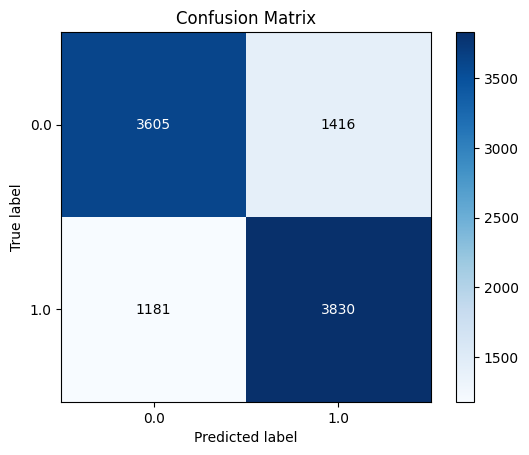

In [72]:
# Make predictions on the test set
y_pred_log = log_clf.predict(x_test)
# See classification Report
print(classification_report(y_test, y_pred_log))
# Print Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_log)
# Testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred_log))

#### ANN

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import numpy as np

# Convert them to NumPy arrays if they are DataFrames
x_train = x_train.values if isinstance(x_train, pd.DataFrame) else x_train
y_train = y_train.values if isinstance(y_train, pd.DataFrame) else y_train
x_val = x_val.values if isinstance(x_val, pd.DataFrame) else x_val
y_val = y_val.values if isinstance(y_val, pd.DataFrame) else y_val
x_test = x_test.values if isinstance(x_test, pd.DataFrame) else x_test
y_test = y_test.values if isinstance(y_test, pd.DataFrame) else y_test

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert NumPy arrays to PyTorch tensors and move them to the GPU
x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.FloatTensor(y_train.values).to(device)
x_val = torch.FloatTensor(x_val).to(device)
y_val = torch.FloatTensor(y_val.values).to(device)
x_test = torch.FloatTensor(x_test).to(device)
y_test = torch.FloatTensor(y_test.values).to(device)

In [74]:
# Define your ANN model and move it to the GPU
class DiabetesClassifier(nn.Module):
    def __init__(self, input_size):
        super(DiabetesClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  # Input layer to hidden layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)          # Hidden layer to hidden layer
        self.fc3 = nn.Linear(32, 1)           # Hidden layer to output layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

input_size = x_train.shape[1]
model = DiabetesClassifier(input_size).to(device)  # Move the model to the GPU

# Define loss and optimizer
criterion = nn.BCELoss().to(device)  # Move loss function to the GPU
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define data loaders for training and testing
batch_size = 64
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        # forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.view(-1, 1))

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    if (epoch + 1) % 10 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}')

# Evaluation Loop
model.eval()
with torch.no_grad():
    y_pred = model(x_val)
    y_pred = (y_pred > 0.5).float()  # Convert probabilities to binary predictions

# Calculate accuracy
accuracy = accuracy_score(y_val.cpu().numpy(), y_pred.cpu().numpy())  # Move data to CPU for accuracy calculation
print(f'Accuracy on the validation set: {accuracy:.4f}')

Epoch [10/100], Loss: 0.5037
Epoch [20/100], Loss: 0.4976
Epoch [30/100], Loss: 0.4923
Epoch [40/100], Loss: 0.4863
Epoch [50/100], Loss: 0.4821
Epoch [60/100], Loss: 0.4765
Epoch [70/100], Loss: 0.4727
Epoch [80/100], Loss: 0.4689
Epoch [90/100], Loss: 0.4658
Epoch [100/100], Loss: 0.4634
Accuracy on the validation set: 0.7270


#### RNN

In [75]:
# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Define hyperparameters
input_size = x_train.shape[1]
hidden_size = 64
num_layers = 2
output_size = 1
learning_rate = 0.001
num_epochs = 100

# Initialize the model
model = RNN(input_size, hidden_size, num_layers, output_size).to(device)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train.unsqueeze(1))  # Add an extra dimension for the sequence length (seq_len=1)
    loss = criterion(outputs.squeeze(), y_train)  # Squeeze to remove the extra dimension

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation on validation set
model.eval()
with torch.no_grad():
    val_outputs = model(x_val.unsqueeze(1))
    val_predictions = (torch.sigmoid(val_outputs) > 0.5).float()
    val_accuracy = accuracy_score(y_val.cpu().numpy(), val_predictions.cpu().numpy())
    print(f'Validation Accuracy: {val_accuracy:.4f}')

# Evaluation on test set
test_outputs = model(x_test.unsqueeze(1))
test_predictions = (torch.sigmoid(test_outputs) > 0.5).float()
test_accuracy = accuracy_score(y_test.cpu().numpy(), test_predictions.cpu().numpy())
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch [10/100], Loss: 0.6113
Epoch [20/100], Loss: 0.5555
Epoch [30/100], Loss: 0.5329
Epoch [40/100], Loss: 0.5232
Epoch [50/100], Loss: 0.5190
Epoch [60/100], Loss: 0.5176
Epoch [70/100], Loss: 0.5171
Epoch [80/100], Loss: 0.5168
Epoch [90/100], Loss: 0.5166
Epoch [100/100], Loss: 0.5165
Validation Accuracy: 0.7462
Test Accuracy: 0.7431
